In [1]:
!pip install pydub==0.24.1
!pip install nnAudio==0.2.0
!pip install yolov5==5.0.3

     |████████████████████████████████| 788kB 27.2MB/s 
     |████████████████████████████████| 645kB 43.7MB/s 
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [2]:
!git clone https://github.com/RedbirdTaiwan/silic

Cloning into 'silic'...
remote: Enumerating objects: 139, done.
remote: Counting objects: 100% (121/121), done.
remote: Compressing objects: 100% (95/95), done.
remote: Total 139 (delta 50), reused 82 (delta 24), pack-reused 18
Receiving objects: 100% (139/139), 148.58 MiB | 36.90 MiB/s, done.
Resolving deltas: 100% (53/53), done.


In [3]:
%cd 'silic'
!git pull
import pandas as pd
import silic
from IPython.display import Image

/content/silic
Already up to date.


In [4]:
model = silic.Silic()
model.audio('sample/49593.mp3')

STFT kernels created, time used = 0.1925 seconds
STFT kernels created, time used = 0.0936 seconds
STFT filter created, time used = 0.0049 seconds
Mel filter created, time used = 0.0049 seconds
Origional audio: channel = 1, sample_rate = 32000 Hz, sample_size = 192000, duration = 6.0 s
Standarized audio: channel = 1, sample_rate = 32000 Hz, sample_size = 192000, duration = 6.0 s


Spectrogram was saved to sample/linear/49593.jpg.


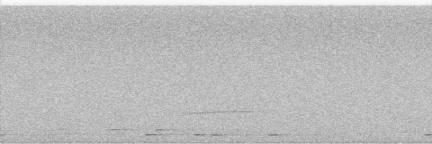

In [5]:
spect_linear = model.tfr()
Image(spect_linear)

Spectrogram was saved to sample/mel/49593.jpg.


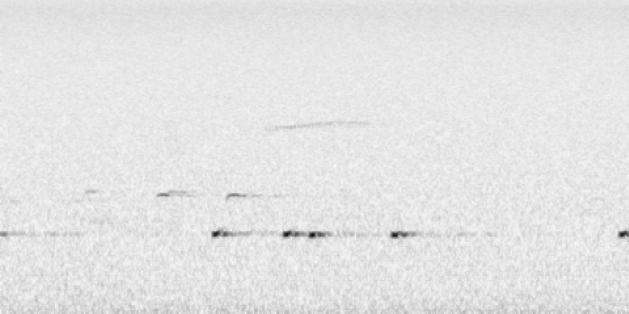

In [6]:
spect_mel = model.tfr(spect_type='mel')
Image(spect_mel)

Spectrogram was saved to sample/rainbow/49593.jpg.


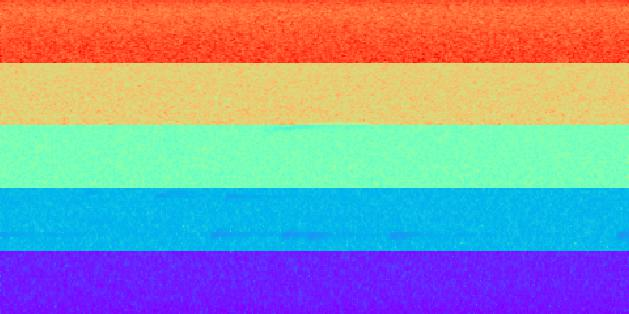

In [8]:
spect_rainbow = model.tfr(spect_type='rainbow')
Image(spect_rainbow)

In [9]:
labels = model.detect(weights='model/exp14/best.pt', step=1000, soundclasses=[66,101], conf_thres=0.1)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Spectrogram was saved to sample/rainbow/49593.jpg.


In [10]:
df = pd.DataFrame(labels[1:],columns=labels[0])
df = df.sort_values('time_begin')
print(df)

               file  classid  time_begin  time_end  freq_low  freq_high  score
0  sample/49593.mp3      101         822      1854      1444       1749  0.562
2  sample/49593.mp3       66        1994      3962       810       1196  0.731
1  sample/49593.mp3       66        1997      3000       824       1214  0.846
3  sample/49593.mp3       66        2019      3968       810       1196  0.792
5  sample/49593.mp3       66        3000      4061       796       1178  0.827
4  sample/49593.mp3       66        5876      6000       810       1214  0.416


In [11]:
newlabels = silic.clean_multi_boxes(labels)
print(newlabels)

               file  classid  time_begin  time_end  freq_low  freq_high  score
0  sample/49593.mp3      101         822      1854      1444       1749  0.562
1  sample/49593.mp3       66        1994      4061       796       1214  0.846
2  sample/49593.mp3       66        5876      6000       810       1214  0.416


In [12]:
label_img = silic.draw_labels(model, newlabels)

Spectrogram was saved to sample/linear/49593.jpg.
sample/labels/49593.jpg saved


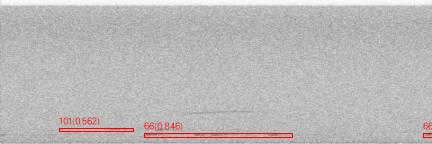

In [13]:
Image(label_img)